<a href="https://colab.research.google.com/github/vasa19/Data-Science/blob/master/Statistics/Stratified_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stratified Sampling**

### Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving startup_funding.csv to startup_funding.csv


### Importing Library

In [ ]:
import pandas as pd

### Question

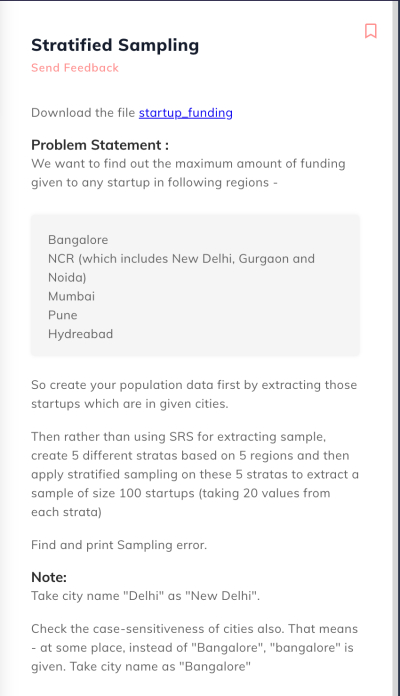

### Solution

In [ ]:
df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [ ]:
# Filling NaN City Location to null
df['CityLocation'] = df['CityLocation'].fillna('null')

In [ ]:
# Filling NaN AmountInUSD to 0
df['AmountInUSD'] = df['AmountInUSD'].fillna('0')

In [ ]:
# Filtering out 0 amount of funding
df1 = df.loc[~(df['AmountInUSD'] == '0')]

In [ ]:
df1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN


In [ ]:
# Removing comma in betwwen of numbers
df1['AmountInUSD'] = df1['AmountInUSD'].replace(',', '', regex=True)

In [ ]:
df1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000,NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000,NaN


In [ ]:
# Converting AmountInUSD to int
df1['AmountInUSD'] = df1['AmountInUSD'].astype(int)

In [ ]:
df1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000,NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000,NaN


In [ ]:
# Filtering out the CityLocation given in the question
import re
new_df = df1.loc[df1['CityLocation'].str.contains('New Delhi|bangalore|Mumbai|Gurgaon|Noida|Pune|Hyderabad', flags = re.IGNORECASE, regex = True)]
new_df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000,NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,20000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2194,2194,29/04/2015,ReGlobe,Used Gadgets Buy / Refurbishing,NaN,Gurgaon,"Bessemer Ventures, Blume Ventures",Seed Funding,1000000,NaN
2195,2195,29/04/2015,Icertis,Cloud Enterprise Software,NaN,Pune / US,"Greycroft Partners, Fidelity Growth Partners",Private Equity,6000000,Series A
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,3500000,Series A
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,400000,NaN


In [ ]:
# Dividing the region according to the location

region_Bangalore = new_df.loc[(new_df['CityLocation'] == 'Bangalore') | (new_df['CityLocation'] == 'bangalore')]
region_NCR = new_df.loc[(new_df['CityLocation'] == 'New Delhi') | (new_df['CityLocation'] == 'Gurgaon') | (new_df['CityLocation'] == 'Noida')]
region_Pune = new_df.loc[(new_df['CityLocation'] == 'Pune')]
region_Mumbai = new_df.loc[(new_df['CityLocation'] == 'Mumbai')]
region_Hyderabad = new_df.loc[(new_df['CityLocation'] == 'Hyderabad')]

In [ ]:
# Taking out the amount of funding in different regions

amt_Bangalore = region_Bangalore['AmountInUSD']
amt_NCR = region_NCR['AmountInUSD']
amt_Pune = region_Pune['AmountInUSD']
amt_Mumbai = region_Mumbai['AmountInUSD']
amt_Hyderabad = region_Hyderabad['AmountInUSD']

In [ ]:
# Taking sample of the different region with strata size 20

strata_size = 20
sample_Bangalore = amt_Bangalore.sample(strata_size, random_state = 1)
sample_NCR = amt_NCR.sample(strata_size, random_state = 1)
sample_Pune = amt_Pune.sample(strata_size, random_state = 1)
sample_Mumbai = amt_Mumbai.sample(strata_size, random_state = 1)
sample_Hyderabad = amt_Hyderabad.sample(strata_size, random_state = 1)

In [ ]:
# Average of all the region samples

avg_Bangalore = sample_Bangalore.mean()
avg_Mumbai = sample_Mumbai.mean()
avg_NCR = sample_NCR.mean()
avg_Pune = sample_Pune.mean()
avg_Hyderabad = sample_Hyderabad.mean()

In [ ]:
# Calculating avg of the sample

sum_avg = avg_Bangalore + avg_Hyderabad + avg_Mumbai + avg_NCR + avg_Pune
sample_avg = sum_avg / 5
sample_avg

13570840.0

In [ ]:
# Defining the population from the dataset

population = new_df['AmountInUSD']
population

0        1300000
3         500000
4         850000
5        1000000
7       20000000
          ...   
2194     1000000
2195     6000000
2196     3500000
2198      400000
2200     8000000
Name: AmountInUSD, Length: 1257, dtype: int64

In [ ]:
# Calculating the avg of popualtion

pop_avg = population.mean()
pop_avg

13047359.274463007

In [ ]:
# Calculating Sampling Error

sampling_Error = pop_avg - sample_avg
sampling_Error

-523480.7255369928